# Plot the global cases and per continent
In this section, we will create time profiles similar to the previous ones but at the continent level. 

In [159]:
# Data from here:
# https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings('ignore')

import glob
import os

**Read the master table with the cumulative cases.**

In [160]:
# READ, RENAME
covid = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-2020-08-27.xlsx")
# REPLACED WITH THE CODE BELOW THAT EXTRACTS THE LATEST .xlsx FILE IN THE FOLDER

# list_of_files = glob.glob('C:\\Users\\nikan\\Desktop\\COVID_daily/*xlsx') # * means all if need specific format then *.csv
# latest_file = max(list_of_files, key=os.path.getctime)
# print(latest_file)
# covid = pd.read_excel(latest_file) 

covid.rename(columns = {'dateRep': 'DateRep', 'day':'Day', 'month':'Month','year':'Year','cases':'Cases','deaths':'Deaths', 'popData2019':'Population', 'countriesAndTerritories': 'Country', 'continentExp':'Continent'}, inplace = True)

**Perform the groupby aggregation to sum the 'Cases' and 'Deaths' over Date and Continent (notice that here we use the original data, not the cumulative).**

In [161]:
covid_daily_per_continent = covid.groupby(['DateRep','Continent'])[['Cases', 'Deaths']].sum()
covid_daily_per_continent.head(20)

Cases  Deaths
DateRep    Continent               
2019-12-31 Africa         0       0
           America        0       0
           Asia          27       0
           Europe         0       0
           Oceania        0       0
           Other          0       0
2020-01-01 Africa         0       0
           America        0       0
           Asia           0       0
           Europe         0       0
           Oceania        0       0
           Other          0       0
2020-01-02 Africa         0       0
           America        0       0
           Asia           0       0
           Europe         0       0
           Oceania        0       0
           Other          0       0
2020-01-03 Africa         0       0
           America        0       0

**Generate the cumulative sum of Cases and Deaths per Continent.**

In [162]:
covid_daily_per_continent_cumulative = covid_daily_per_continent.groupby(['Continent']).cumsum()
covid_daily_per_continent.reset_index(inplace=True)
covid_daily_per_continent_cumulative.reset_index(inplace=True)
covid_daily_per_continent_cumulative.head(20)

,DateRep,Continent,Cases,Deaths
0,2019-12-31,Africa,0,0
1,2019-12-31,America,0,0
2,2019-12-31,Asia,27,0
3,2019-12-31,Europe,0,0
4,2019-12-31,Oceania,0,0
5,2019-12-31,Other,0,0
6,2020-01-01,Africa,0,0
7,2020-01-01,America,0,0
8,2020-01-01,Asia,27,0
9,2020-01-01,Europe,0,0


**Generate the global sum aggregation.**

In [163]:
covid_daily_global = covid.groupby(['DateRep'])[['Cases', 'Deaths']].sum()
covid_daily_global.reset_index(inplace=True)
covid_daily_global.head(20)

,DateRep,Cases,Deaths
0,2019-12-31,27,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,17,0
4,2020-01-04,0,0
5,2020-01-05,15,0
6,2020-01-06,0,0
7,2020-01-07,0,0
8,2020-01-08,0,0
9,2020-01-09,0,0


**Generate the cumulative sum at the global level.**

In [164]:
covid_daily_global_cumulative = covid.groupby(['DateRep'])[['Cases', 'Deaths']].sum().cumsum()
covid_daily_global_cumulative.reset_index(inplace=True)
covid_daily_global_cumulative.head(20)

,DateRep,Cases,Deaths
0,2019-12-31,27,0
1,2020-01-01,27,0
2,2020-01-02,27,0
3,2020-01-03,44,0
4,2020-01-04,44,0
5,2020-01-05,59,0
6,2020-01-06,59,0
7,2020-01-07,59,0
8,2020-01-08,59,0
9,2020-01-09,59,0


**Define two functions to convert values of millions and thousands to M and k format, respectively. E.g. 1,000,000 will be represented in the graph as 1M and 1,000 as 1k.**

In [165]:
# TO CONVERT THE MILLIONS IN THE Y-AXIS TO 1M, 2M, etc
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0fM' % (x * 1e-6)
formatter_mil = FuncFormatter(millions)

# TO CONVERT THE THOUSANDS IN THE Y-AXIS TO 1K, 2K, etc
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fk' % (x * 1e-3)
formatter_kil = FuncFormatter(thousands)

**Configure the x-axis ticks format. Here, we want to show the months instead of Day from 100 cases. The format specified here takes care of that.**

In [166]:
# TO PLOT MTH IN THE X-AXIS
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

**Create the data frame with the values on the last day. This will be helpful to annotate the graphs. Also, generate the list of the continents.**

In [167]:
last_day_covid = covid_daily_per_continent[covid_daily_per_continent['DateRep'] == covid_daily_per_continent['DateRep'].max()]
last_day_covid_cumulative = covid_daily_per_continent_cumulative[covid_daily_per_continent_cumulative['DateRep'] == covid_daily_per_continent_cumulative['DateRep'].max()]
continents = last_day_covid['Continent'].to_list()

**Generate the 2×2 subplots of the daily and cumulative cases for continents and globally**

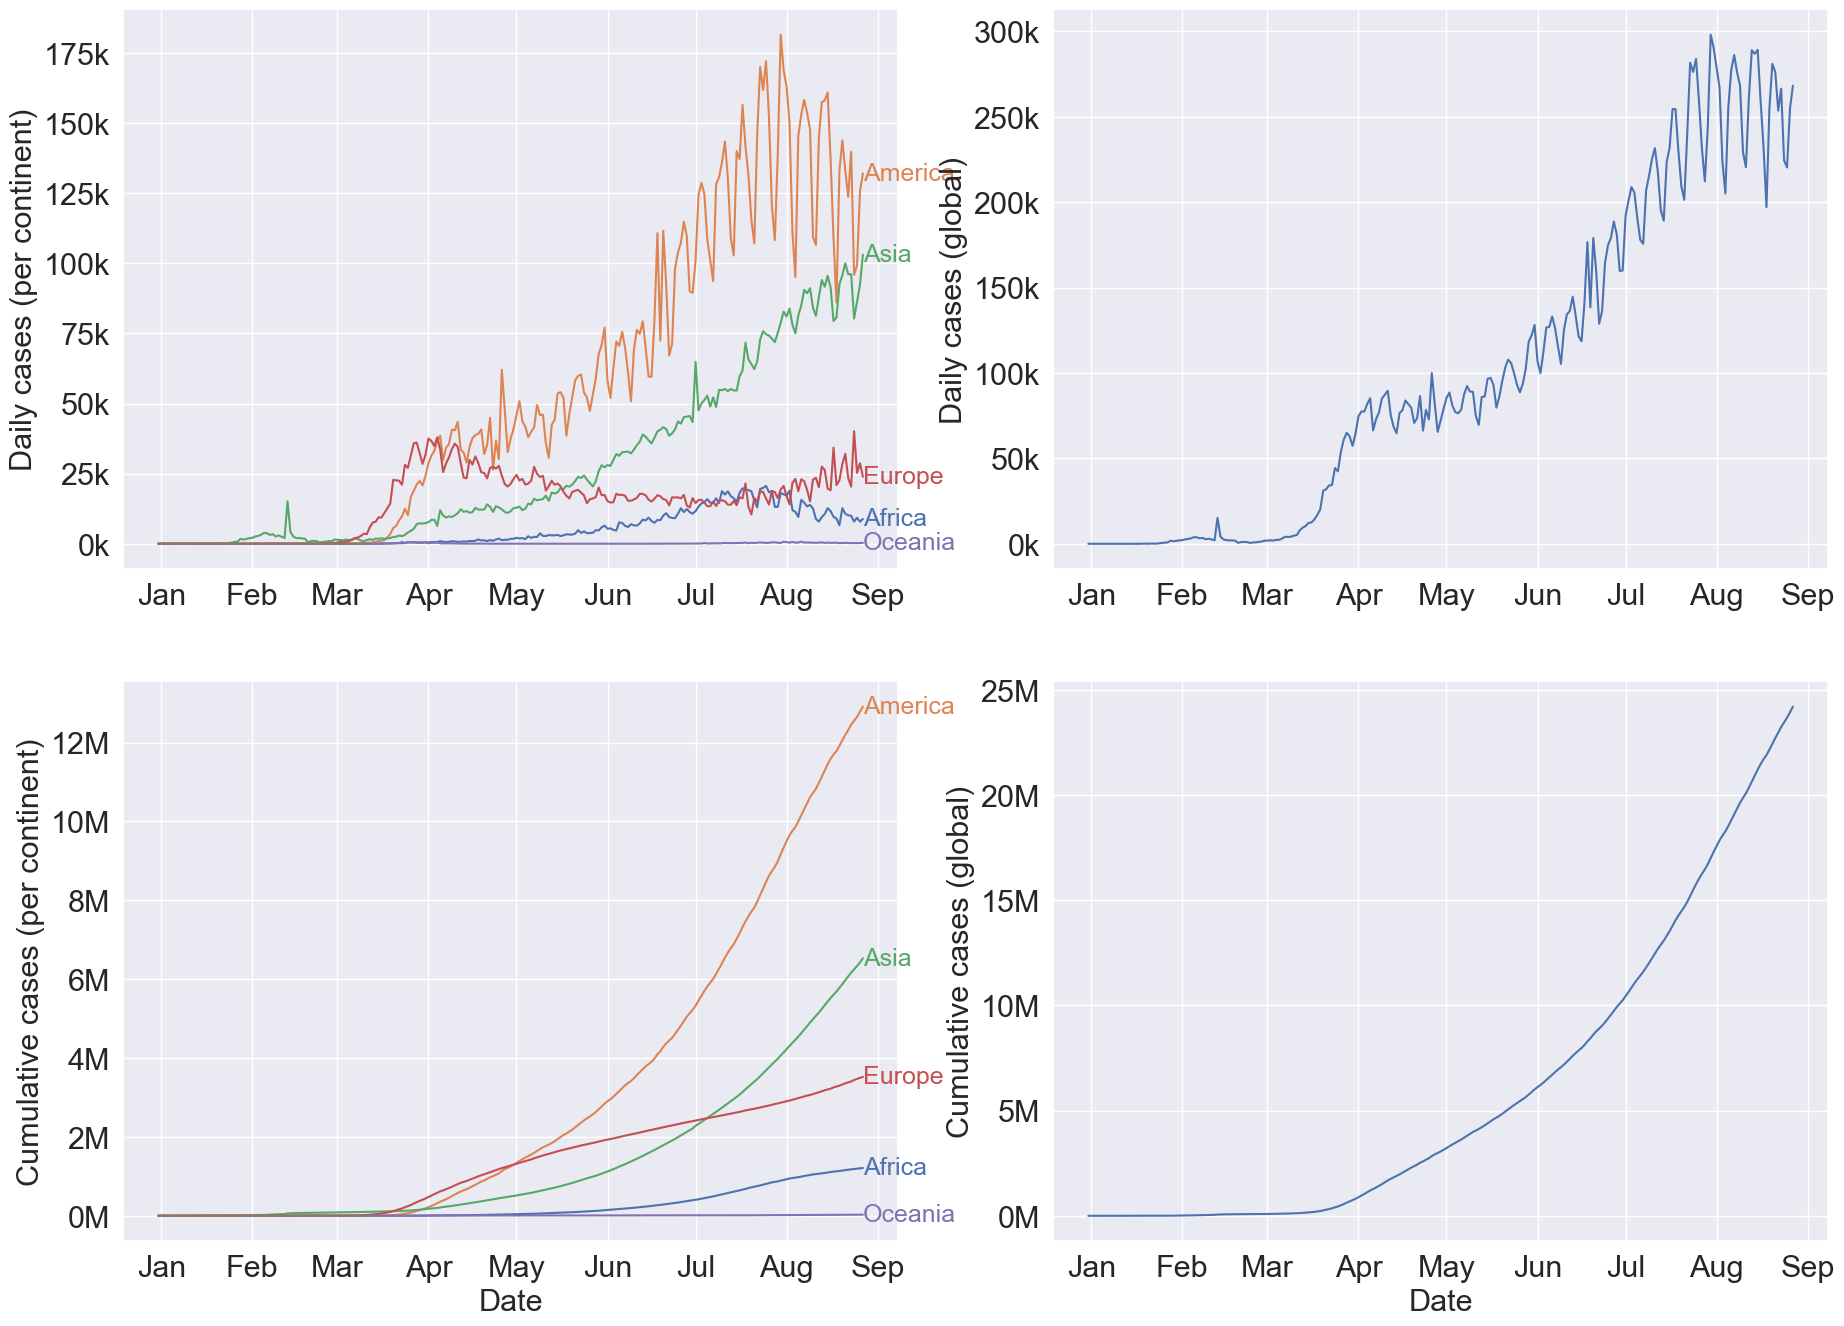

In [168]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent, markers=True, legend=False, ax=axes[0, 0]) #, hue_order=countries_1_5
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
# adjust_text(texts)
axes[0, 0].set_ylabel("Daily cases (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative cases (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Daily cases (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative cases (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('covid_h_Infection_rate_per_continent.png')

## Task #4: Smoothing the noisy data

### Part A

The graphs clearly show a noisy pattern with significant drops every 7 days for Europe and America. This is probably due to reporting being limited in some countries on certain days.

Here, you are asked to use the 7-day smoothing method we used in section 3 that uses stats.linregress to generate the same 2×2 subplots of the daily cases with the smoothed daily cases in the top 2 graphs.

In [169]:
## 7 day moving average
back_calc = 7
slope_df = pd.DataFrame(columns=['Continent', 'Cases', 'Slope', 'R2', 'P_value'])

for continent in continents:
    one_continent_data = covid_daily_per_continent[covid_daily_per_continent['Continent'] == str(continent)].reset_index(drop=True)
    delta = (one_continent_data.DateRep - one_continent_data.DateRep[0])
    days = delta.dt.days
    one_continent_data['days'] = days

    for i in np.arange(back_calc, len(one_continent_data)+1):
        x = one_continent_data.loc[i-back_calc: i, 'days']
        y = one_continent_data.loc[i-back_calc: i, 'Cases'] # 
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        one_continent_data.loc[i-1, 'Slope'] = slope
        one_continent_data.loc[i-1, 'Intercept'] = intercept
        one_continent_data.loc[i-1, 'R2'] = r_value * r_value
        one_continent_data.loc[i-1, 'P_value'] = p_value
        one_continent = one_continent_data[['Continent', 'days', 'Cases', 'Slope', 'Intercept', 'R2', 'P_value']]
    one_continent['smoothed_data'] = one_continent_data['Slope']*one_continent_data['days'] + one_continent_data['Intercept']
    slope_df = slope_df.append(one_continent, ignore_index=False)

one_continent_data = covid_daily_global
delta = (covid_daily_global.DateRep - covid_daily_global.DateRep[0])
days = delta.dt.days
covid_daily_global['days'] = days
for i in np.arange(back_calc, len(covid_daily_global)+1):
    x = covid_daily_global.loc[i-back_calc: i, 'days']
    y = covid_daily_global.loc[i-back_calc: i, 'Cases'] # 
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    covid_daily_global.loc[i-1, 'Slope'] = slope
    covid_daily_global.loc[i-1, 'Intercept'] = intercept    
    covid_daily_global.loc[i-1, 'R2'] = r_value * r_value
    covid_daily_global.loc[i-1, 'P_value'] = p_value
covid_daily_global['smoothed_data'] = covid_daily_global['Slope']*covid_daily_global['days'] + covid_daily_global['Intercept']



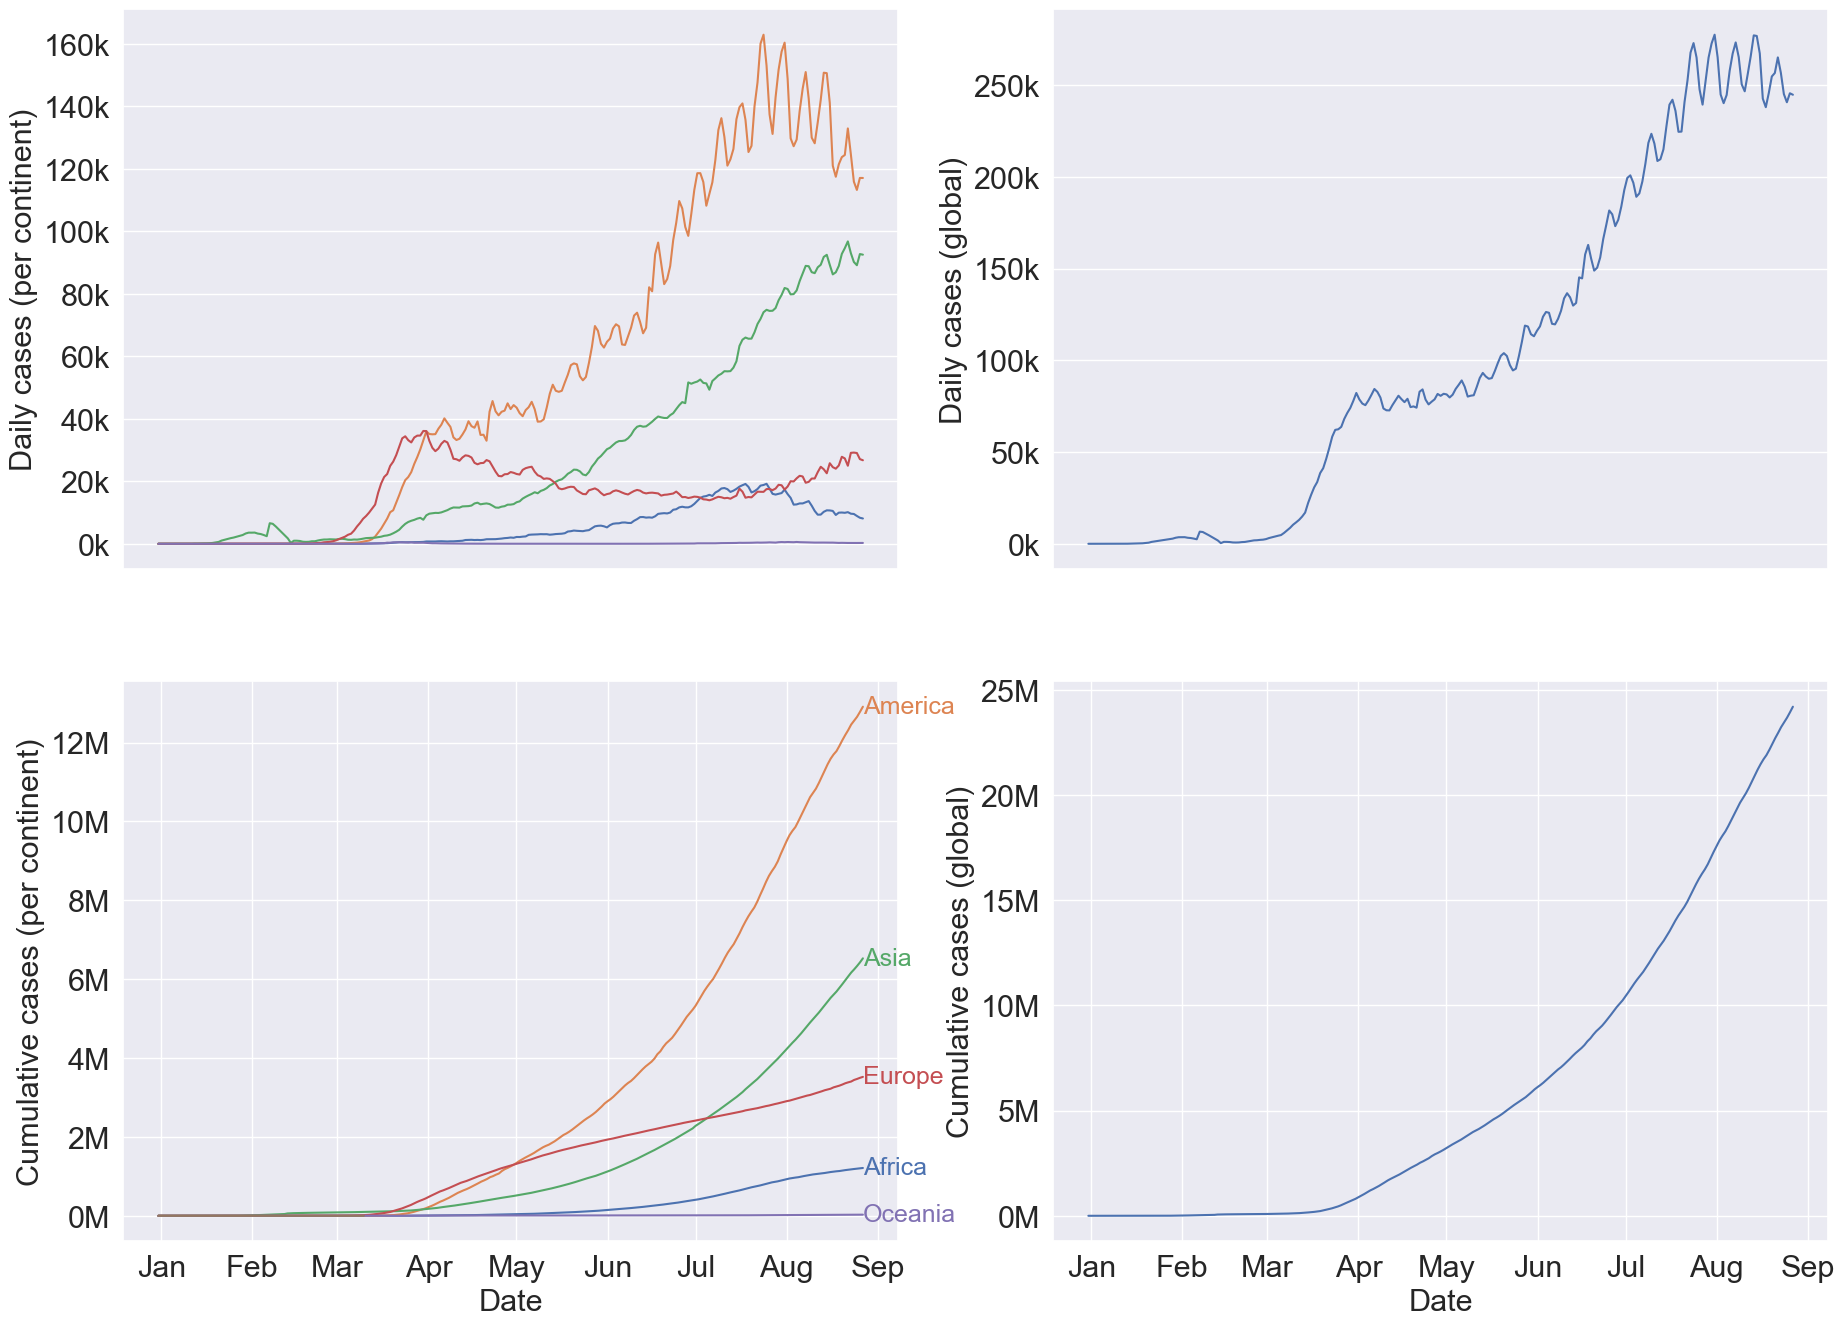

In [170]:
slope_df.index.name = None
max_slope = slope_df.groupby(by=['Continent']).max()
max_slope = max_slope.sort_values('Slope', ascending=False)
max_slope['Continent'] = max_slope.index

data_continent = slope_df[slope_df.Continent.isin(max_slope['Continent'].tolist())]
data_continent['uniqid'] = data_continent['Continent']+data_continent['days'].astype(str)
data_continent = data_continent.set_index('uniqid')

sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="days", y="smoothed_data", hue="Continent", data=data_continent, markers=True, legend=False, ax=axes[0, 0]) #, hue_order=countries_1_5
#texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
# adjust_text(texts)
axes[0, 0].set_ylabel("Daily cases (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative cases (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="days", y="smoothed_data", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Daily cases (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative cases (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('Fig_4_1_Dokhale_Priyadarshani.png')


**Here the rolling window is only of 7 days, but as we keep increasing the rolling window, it will increase the smoothing.**

### Part B

**Also, in a separate 2×2 subplots graph show the 7-day smoothed plots of the daily mortalities and the cumulative mortalities.**

Firstly, the graph is drawn without smoothing for deaths to show how much noise is present.

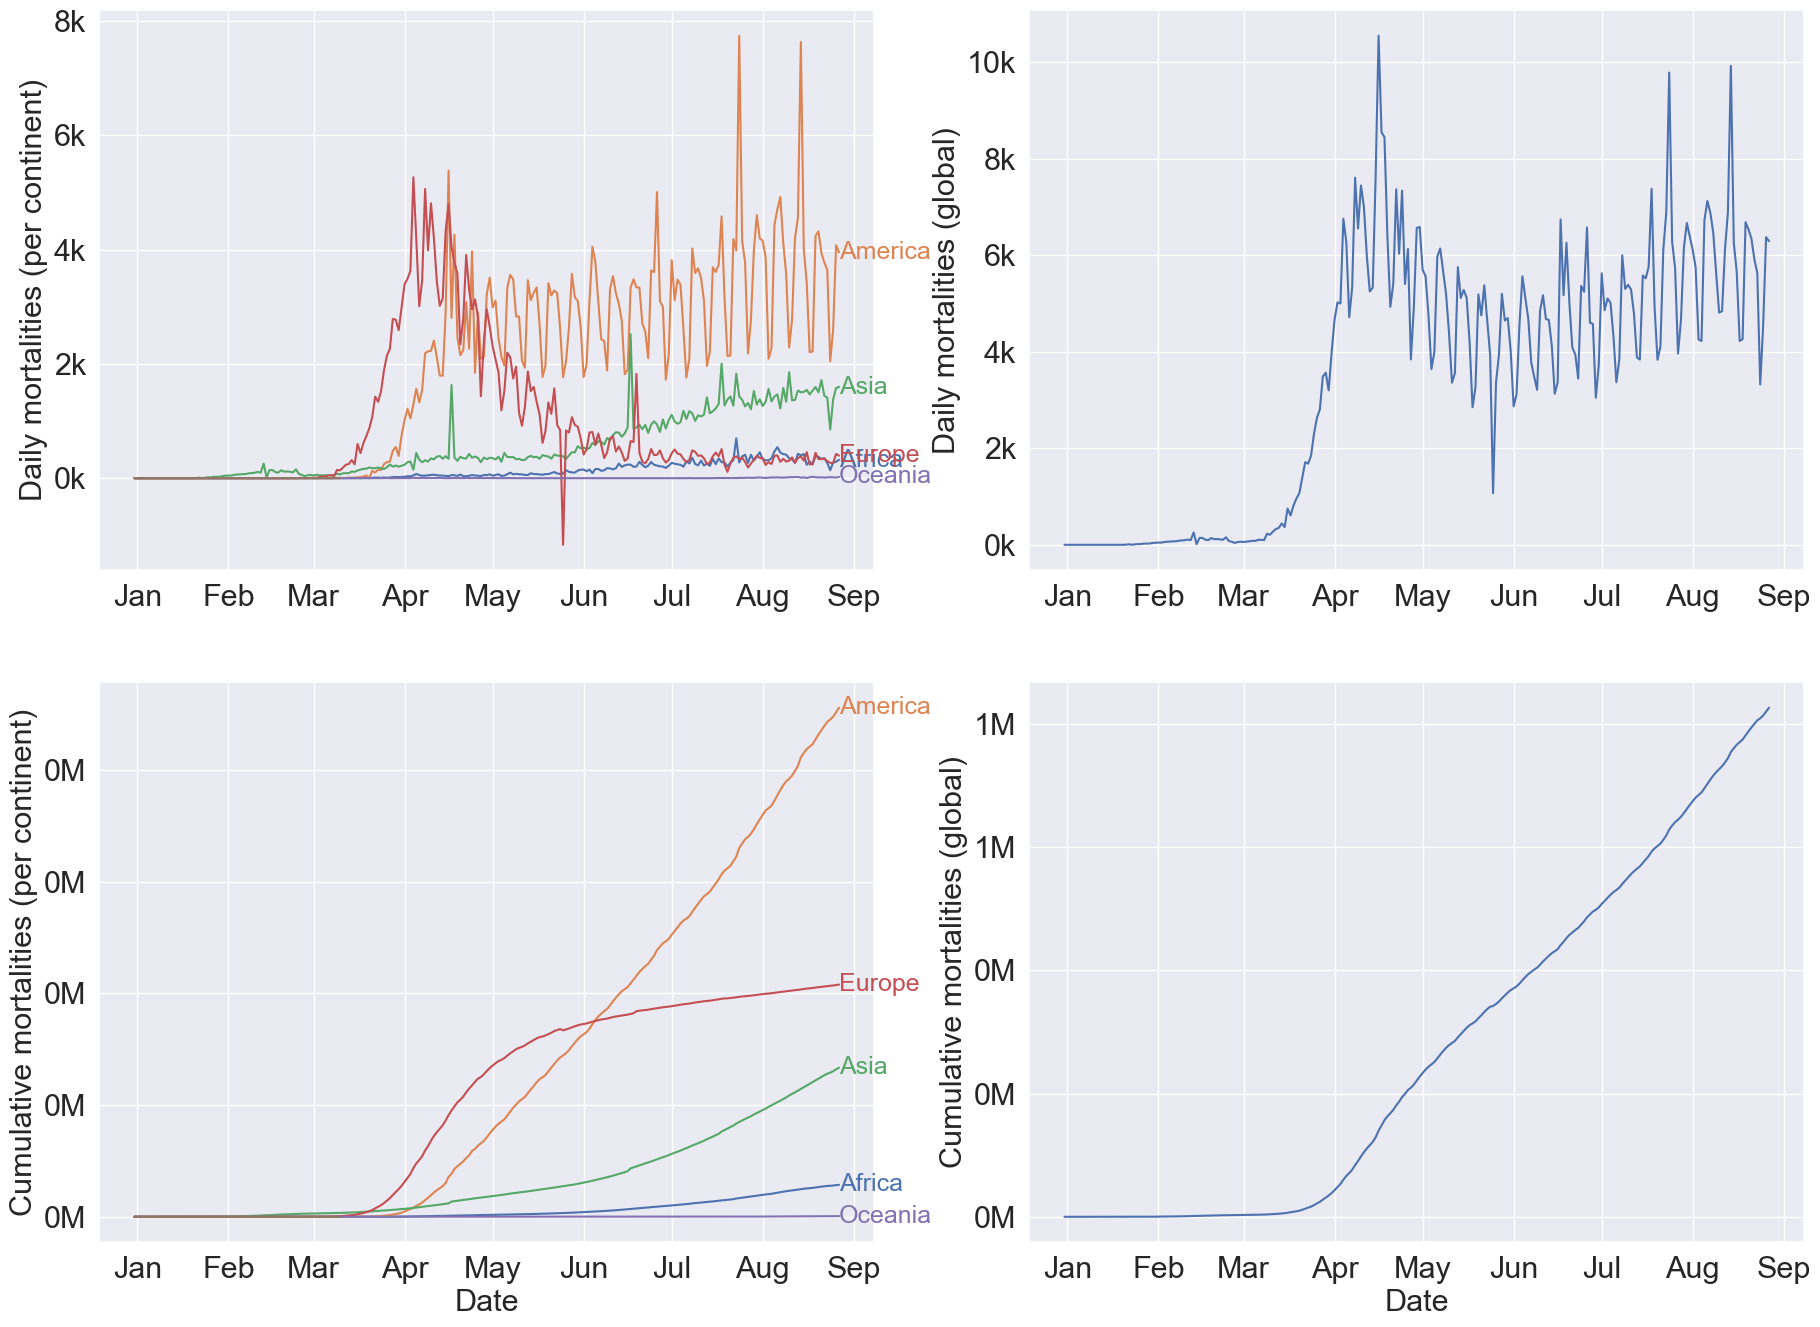

In [171]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="DateRep", y="Deaths", hue="Continent", data=covid_daily_per_continent, markers=True, legend=False, ax=axes[0, 0]) #, hue_order=countries_1_5
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
# adjust_text(texts)
axes[0, 0].set_ylabel("Daily mortalities (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Deaths", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Deaths'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative mortalities (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="Deaths", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Daily mortalities (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Deaths", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative mortalities (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('covid_h_Mortality_rate_per_continent.png')

Similar to the infection rate plot, the noise was observed, hence smoothing is done.

In [172]:
## 7 day moving average
back_calc = 7
slope_df = pd.DataFrame(columns=['Continent', 'Deaths', 'Slope', 'R2', 'P_value'])

for continent in continents:
    one_continent_data = covid_daily_per_continent[covid_daily_per_continent['Continent'] == str(continent)].reset_index(drop=True)
    delta = (one_continent_data.DateRep - one_continent_data.DateRep[0])
    days = delta.dt.days
    one_continent_data['days'] = days

    for i in np.arange(back_calc, len(one_continent_data)+1):
        x = one_continent_data.loc[i-back_calc: i, 'days']
        y = one_continent_data.loc[i-back_calc: i, 'Deaths'] # 
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        one_continent_data.loc[i-1, 'Slope'] = slope
        one_continent_data.loc[i-1, 'Intercept'] = intercept
        one_continent_data.loc[i-1, 'R2'] = r_value * r_value
        one_continent_data.loc[i-1, 'P_value'] = p_value
        one_continent = one_continent_data[['Continent', 'days', 'Deaths', 'Slope', 'Intercept', 'R2', 'P_value']]
    one_continent['smoothed_data'] = one_continent_data['Slope']*one_continent_data['days'] + one_continent_data['Intercept']
    slope_df = slope_df.append(one_continent, ignore_index=False)

one_continent_data = covid_daily_global
delta = (covid_daily_global.DateRep - covid_daily_global.DateRep[0])
days = delta.dt.days
covid_daily_global['days'] = days
for i in np.arange(back_calc, len(covid_daily_global)+1):
    x = covid_daily_global.loc[i-back_calc: i, 'days']
    y = covid_daily_global.loc[i-back_calc: i, 'Deaths'] # 
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    covid_daily_global.loc[i-1, 'Slope'] = slope
    covid_daily_global.loc[i-1, 'Intercept'] = intercept    
    covid_daily_global.loc[i-1, 'R2'] = r_value * r_value
    covid_daily_global.loc[i-1, 'P_value'] = p_value
covid_daily_global['smoothed_data'] = covid_daily_global['Slope']*covid_daily_global['days'] + covid_daily_global['Intercept']



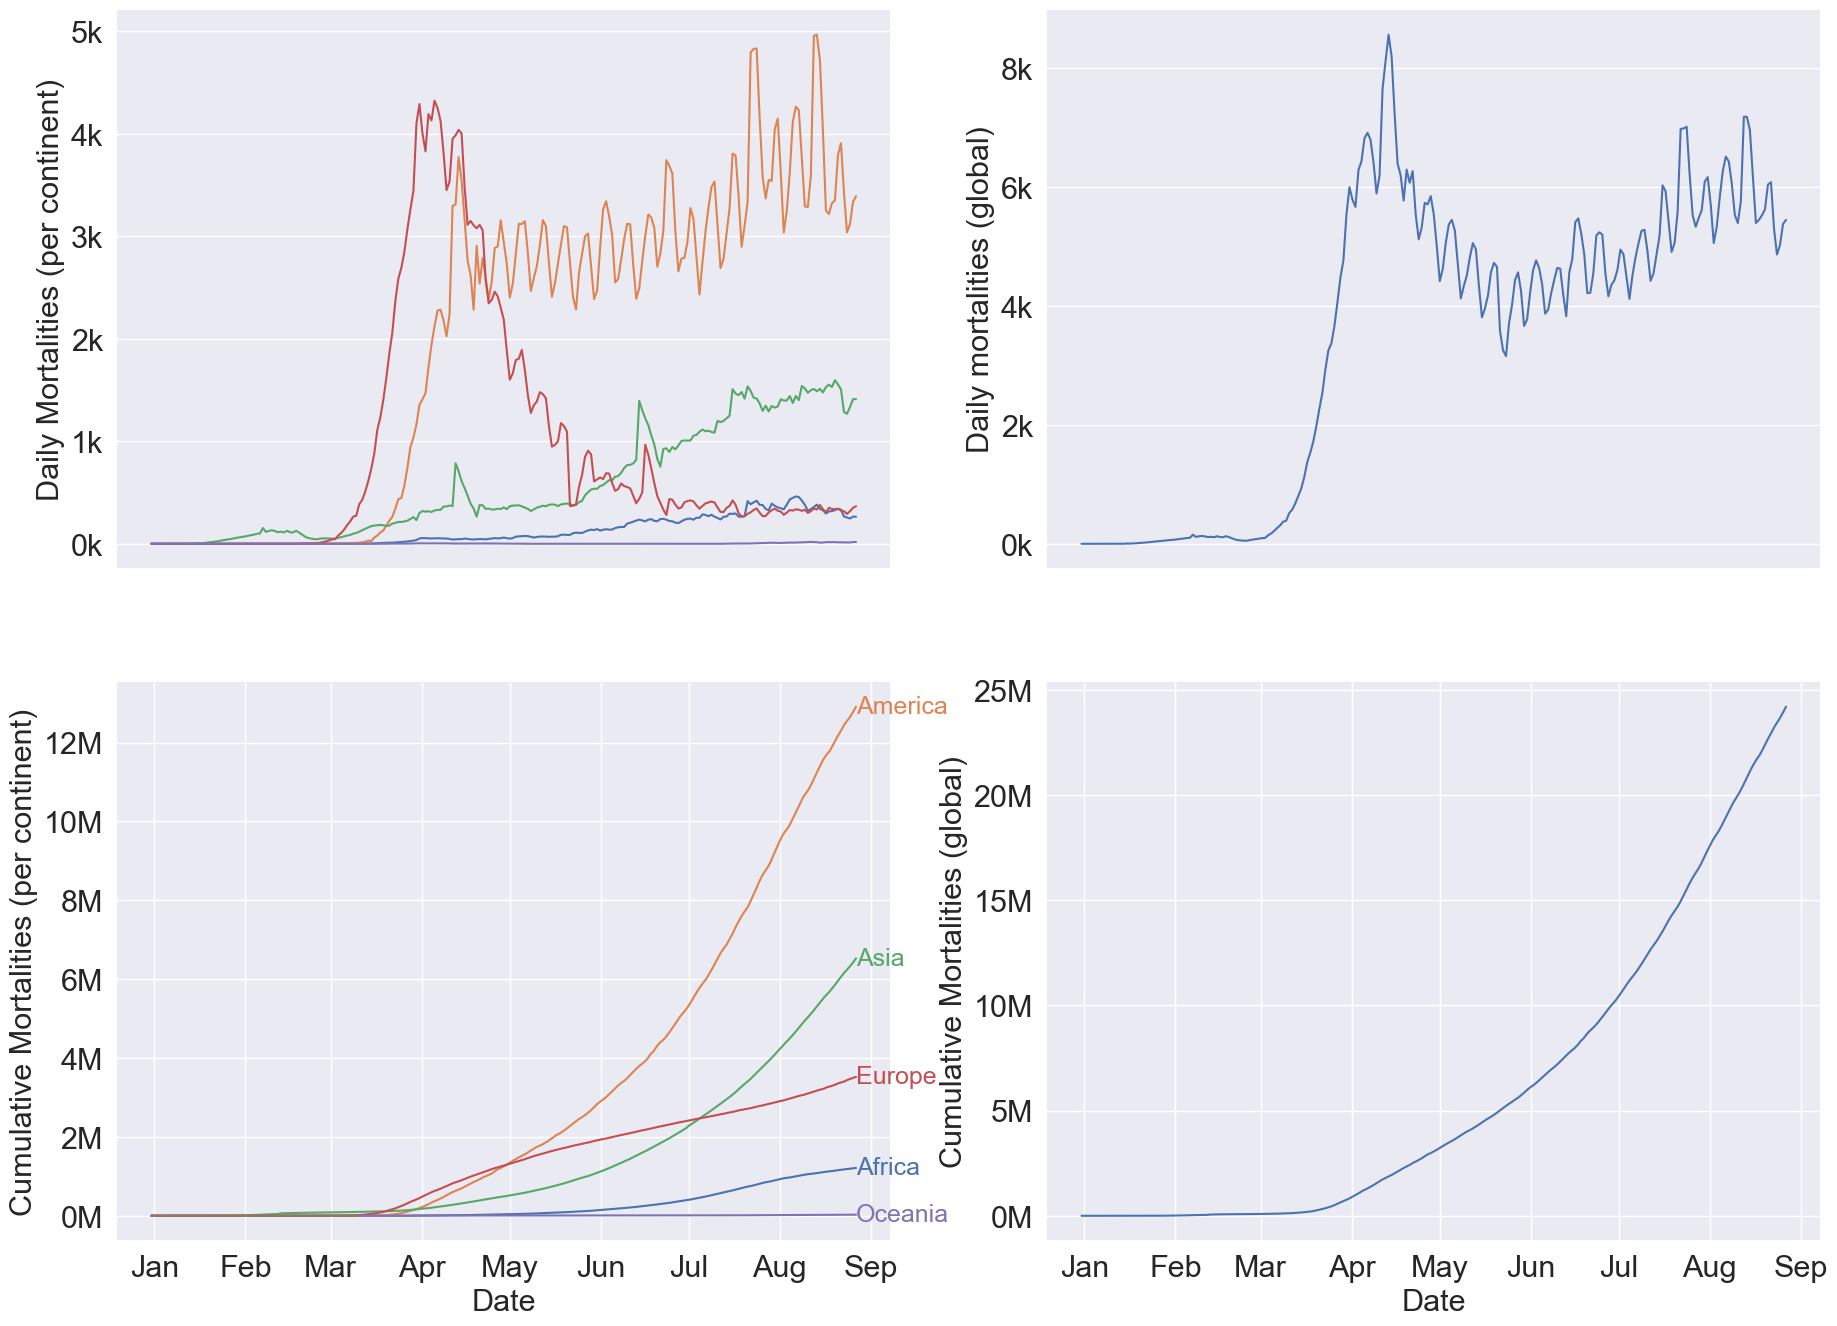

In [173]:
slope_df.index.name = None
max_slope = slope_df.groupby(by=['Continent']).max()
max_slope = max_slope.sort_values('Slope', ascending=False)
max_slope['Continent'] = max_slope.index

data_continent = slope_df[slope_df.Continent.isin(max_slope['Continent'].tolist())]
data_continent['uniqid'] = data_continent['Continent']+data_continent['days'].astype(str)
data_continent = data_continent.set_index('uniqid')

sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="days", y="smoothed_data", hue="Continent", data=data_continent, markers=True, legend=False, ax=axes[0, 0]) #, hue_order=countries_1_5
#texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
# adjust_text(texts)
axes[0, 0].set_ylabel("Daily Mortalities (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative Mortalities (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="days", y="smoothed_data", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Daily mortalities (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative Mortalities (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('Fig_4_2_Dokhale_Priyadarshani.png')

